# Import data and necessary modules

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Set up df, and get descriptive statistics by column

In [113]:
df_house = pd.read_csv("house_prices.csv")
df_house.describe(include='all')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,13580,13580,13580.000000,13580,1.358000e+04,13580,13580,13580,13580.000000,13580.000000,...,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,12211,13580.000000,13580.000000,13580,13580.000000
unique,314,13378,NaN,3,NaN,5,268,58,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,8,NaN
top,Reservoir,28 Blair St,NaN,h,NaN,S,Nelson,27/05/2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Moreland,NaN,NaN,Southern Metropolitan,NaN
freq,359,3,NaN,9449,NaN,9022,1565,473,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1163,NaN,NaN,4695,NaN
mean,NaN,NaN,2.937997,NaN,1.075684e+06,NaN,NaN,NaN,10.137776,3105.301915,...,1.534242,1.610075,558.416127,151.967650,1964.684217,NaN,-37.809203,144.995216,NaN,7454.417378
std,NaN,NaN,0.955748,NaN,6.393107e+05,NaN,NaN,NaN,5.868725,90.676964,...,0.691712,0.962634,3990.669241,541.014538,37.273762,NaN,0.079260,0.103916,NaN,4378.581772
min,NaN,NaN,1.000000,NaN,8.500000e+04,NaN,NaN,NaN,0.000000,3000.000000,...,0.000000,0.000000,0.000000,0.000000,1196.000000,NaN,-38.182550,144.431810,NaN,249.000000
25%,NaN,NaN,2.000000,NaN,6.500000e+05,NaN,NaN,NaN,6.100000,3044.000000,...,1.000000,1.000000,177.000000,93.000000,1940.000000,NaN,-37.856822,144.929600,NaN,4380.000000
50%,NaN,NaN,3.000000,NaN,9.030000e+05,NaN,NaN,NaN,9.200000,3084.000000,...,1.000000,2.000000,440.000000,126.000000,1970.000000,NaN,-37.802355,145.000100,NaN,6555.000000
75%,NaN,NaN,3.000000,NaN,1.330000e+06,NaN,NaN,NaN,13.000000,3148.000000,...,2.000000,2.000000,651.000000,174.000000,1999.000000,NaN,-37.756400,145.058305,NaN,10331.000000


# Build a histogram of price

In [88]:
price = df_house.loc[:,'Price']

(0.0, 870.0)

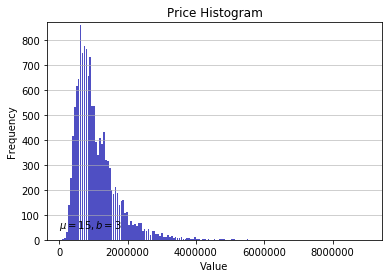

In [89]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=price, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Price Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

#### Data seems heavily skewed right, let's try to normalize it

# Histogram of price normalized

In [139]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y
price_norm = normalize(price)
price_norm.describe()

count    13580.000000
mean         0.111126
std          0.071712
min          0.000000
25%          0.063376
50%          0.091755
75%          0.139652
max          1.000000
Name: Price, dtype: float64

(0.0, 870.0)

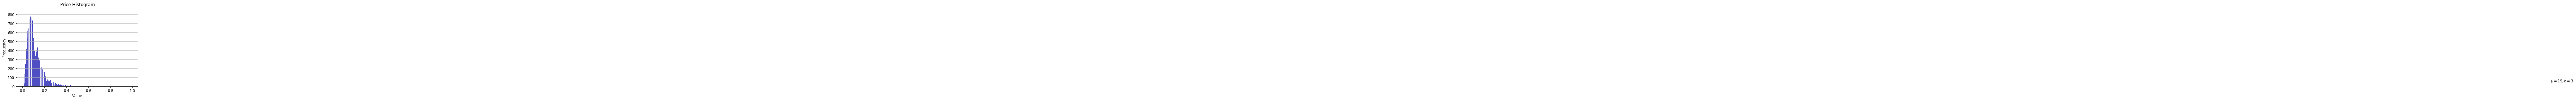

In [140]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=price_norm, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Price Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

#### That didn't work... try with log normalization

# Histogram of log of price normalized



In [147]:
#https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16

In [145]:
price_log = np.log(price)

price_log_norm = normalize(price_log)
price_log_norm.describe()

count    13580.000000
mean         0.513685
std          0.112988
min          0.000000
25%          0.436332
50%          0.506844
75%          0.589895
max          1.000000
Name: Price, dtype: float64

(0.0, 690.0)

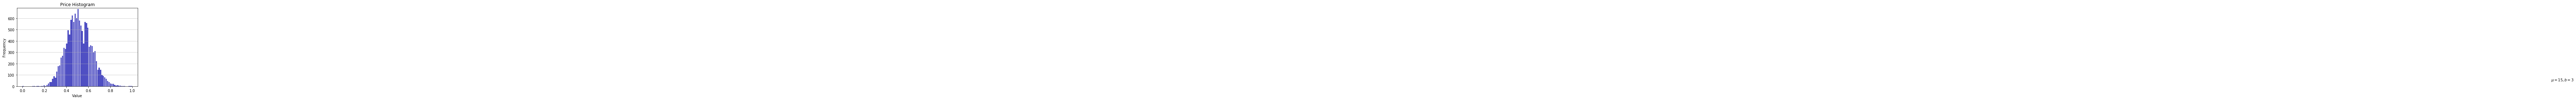

In [146]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=price_log_norm, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Price Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

#### That's better, now we can take a look at how some variables affect price.

# Look at how different variables affect price

## Look for correlation of price with number of bedrooms and bathrooms

In [179]:
bed = df_house.loc[:,'Rooms']
bath = df_house.loc[:,'Bathroom']
Y = price_log_norm

### Plot bed and bath numbers against normalized price

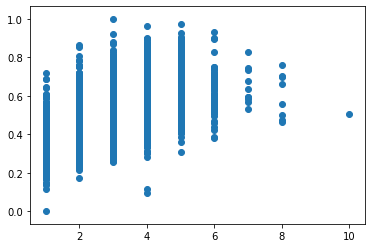

In [180]:
plt.scatter(bed, Y)

#### Looks like there is a slight upward trend for number of bedrooms

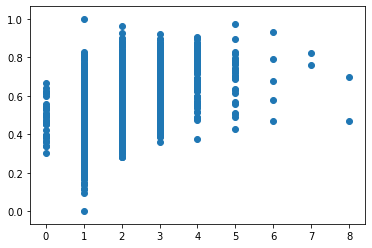

In [181]:
plt.scatter(bath, Y)

#### Looks similar for number of bathrooms too, not a strong predictor though

### Plot bed vs. bath numbers with a colormap showing price

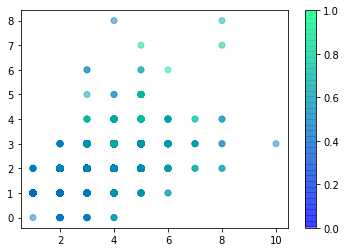

In [252]:
plt.scatter(bed, bath, c=price_log_norm, cmap = 'winter', alpha = 0.5)
cbar = plt.colorbar()

#### This doesn't seem to show us anything valuable enough to predict off

## Look for correlation of price with longitude and latitude

### because it's all about location, location, location, right?

In [266]:
long = df_house.loc[:,'Longtitude']
lat = df_house.loc[:,'Lattitude']

### Plot long, lat against normalized price

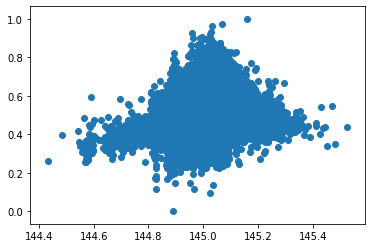

In [267]:
plt.scatter(long, price_log_norm)

#### It seems like the further away from the center of 'town' you get, the less variability there is in the the price of the property.

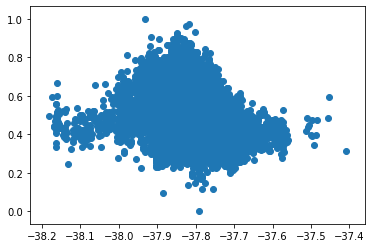

In [268]:
plt.scatter(lat, price_log_norm)

#### This seems to show the same as above

### Plot long vs. lat with a colormap for price

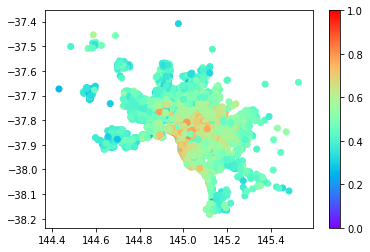

In [253]:
plt.scatter(long, lat, c=price_log_norm, cmap = 'rainbow')
cbar = plt.colorbar()

#### more expensive properties seem to be closer to the center of 'town', let's zoom in to see how reliable a prediction might be based on this observation

#### we can say that it looks like most of the 'suburbs' will be similarly priced, independent of distance and direction from downtown

(145, 145.2)

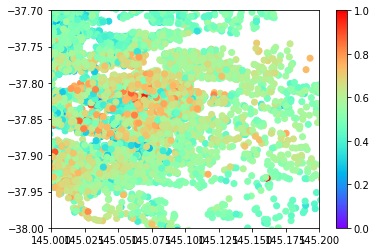

In [254]:
plt.scatter(long, lat, c=price_log_norm, cmap = 'rainbow')
cbar = plt.colorbar()


plt.ylim(-38,-37.7)
plt.xlim(145, 145.2)

#### there is still too much variablility in price even at the center of 'town', there seems to be no way to reliably predict price in 'town' this way

0.023696815441539676


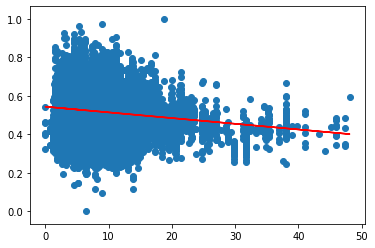

In [269]:
distance = df_house.loc[:,'Distance']
X = distance.values.reshape(-1, 1)  # values converts it into a numpy array
Y = price_log_norm.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
print(linear_regressor.score(X,Y))

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

count    13580.000000
mean      3105.301915
std         90.676964
min       3000.000000
25%       3044.000000
50%       3084.000000
75%       3148.000000
max       3977.000000
Name: Postcode, dtype: float64

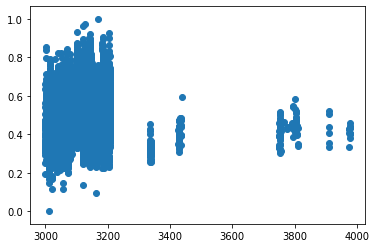

In [256]:
postcode = df_house.loc[:,'Postcode']
plt.scatter(postcode, price_log_norm)
postcode.describe()

#### postcode data shows the same trend that there is too much variability in 'town'

#### we can say that properties in the more distant postcodes will be relatively inexpensive

## Combining bed, bath, and distance in one plot against price

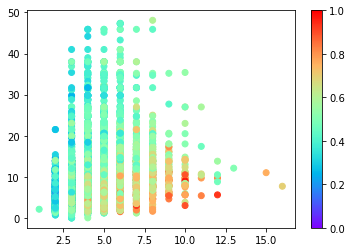

In [275]:
plt.scatter(bed+bath, distance, c=price_log_norm, cmap = 'rainbow')
cbar = plt.colorbar()

#### Not super helpful for prediction, but you can see that it is definitely better to have more 'rooms' and be closer to 'town'

# Regression fits

## # of 'rooms'

0.2181246642119472


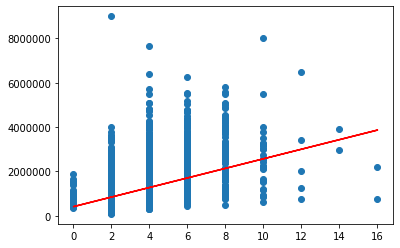

In [304]:
predictor = bath + bath

# Regression model
X = predictor.values.reshape(-1, 1)  # values converts it into a numpy array
Y = price.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
print(linear_regressor.score(X,Y))

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

#### this is actually the best 'score' value I was able to find. It is slightly better than bed and bath individually

0.026413347782635706


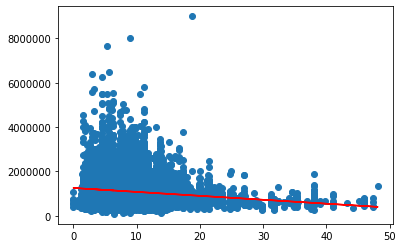

In [299]:
predictor = distance

# Regression model
X = predictor.values.reshape(-1, 1)  # values converts it into a numpy array
Y = price.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
print(linear_regressor.score(X,Y))

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

0.011635287752612689


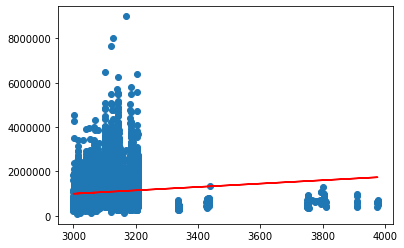

In [301]:
predictor = postcode

# Regression model
X = predictor.values.reshape(-1, 1)  # values converts it into a numpy array
Y = price.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
print(linear_regressor.score(X,Y))

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

## In conclusion, I would choose to predict the price of a property based on columns 'Bedroom2' + 'Bathroom', even though it only has an r^2 value of about 0.3